## Notebook for Data Annotation Visualization

A simple notebook for visualizing ground truth data with the annotated bounding booxes.

Change the image and annotation path as per your dataset directory path.

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import glob as glob
import random
import numpy as np


np.random.seed(100)

In [14]:
image_paths = os.path.join(
    'data',
    'test',
    'img'
)
annotation_paths = os.path.join(
    'data',
    'test',
    "labels_converted"
)

In [15]:
CLASSES = ["pedestrian"]
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

In [16]:
images = glob.glob(os.path.join(image_paths, '*.jpg'))
annotations = glob.glob(os.path.join(annotation_paths, '*.txt'))

images.sort()
annotations.sort()

# Randomize in same order.
random.Random(42).shuffle(images)
random.Random(42).shuffle(annotations)

In [18]:
def read_annotations(txt_path, image_width, image_height):
    """
    Reads bounding box annotations from the new PyTorch format (txt files) and
    denormalizes them to absolute pixel values.

    Expected Format (Normalized):
        <class_id> <x_min> <y_min> <x_max> <y_max>
    
    :param txt_path: Path to the annotation text file
    :param image_width: Width of the corresponding image
    :param image_height: Height of the corresponding image
    :return: boxes (list of [x_min, y_min, x_max, y_max]), labels (list of class names)
    """
    boxes = []
    labels = []
    
    with open(txt_path, "r") as f:
        lines = f.readlines()
    
    for line in lines:
        values = line.strip().split()
        if len(values) != 5:
            print(f"Skipping malformed line in {txt_path}: {line}")
            continue  # Skip incorrect entries
        
        class_id = int(values[0])
        x_min, y_min, x_max, y_max = map(float, values[1:])
        
        # Denormalize coordinates by multiplying with image width & height
        x_min = int(x_min * image_width)
        y_min = int(y_min * image_height)
        x_max = int(x_max * image_width)
        y_max = int(y_max * image_height)

        boxes.append([x_min, y_min, x_max, y_max])
        labels.append(CLASSES[class_id])  # Convert class ID to class name

    return boxes, labels

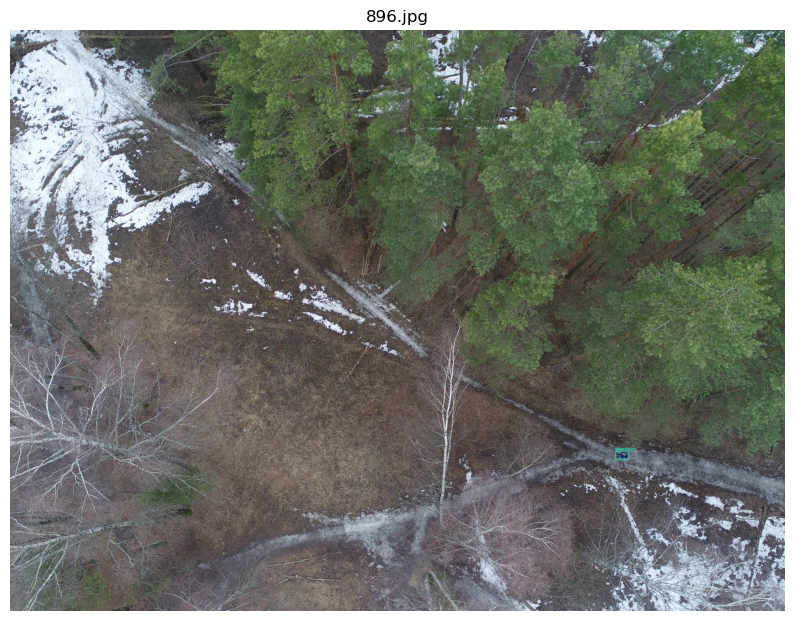

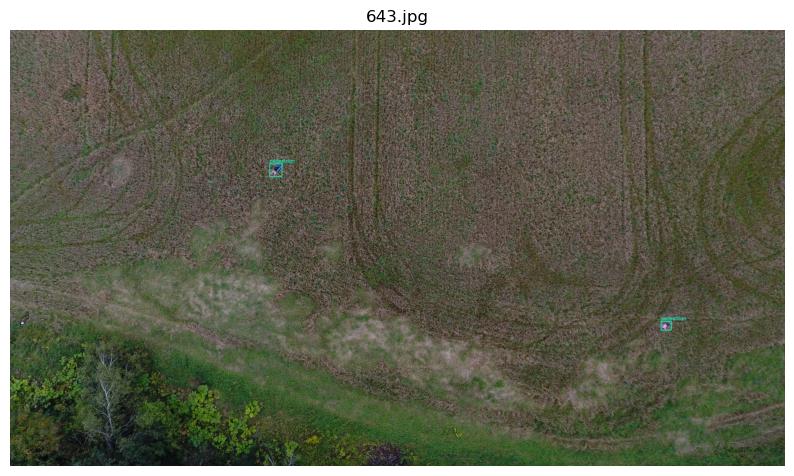

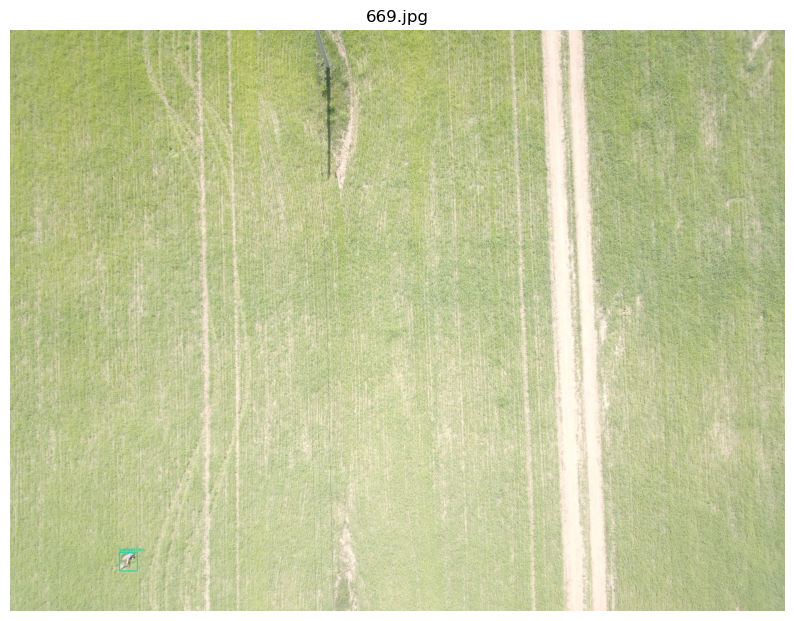

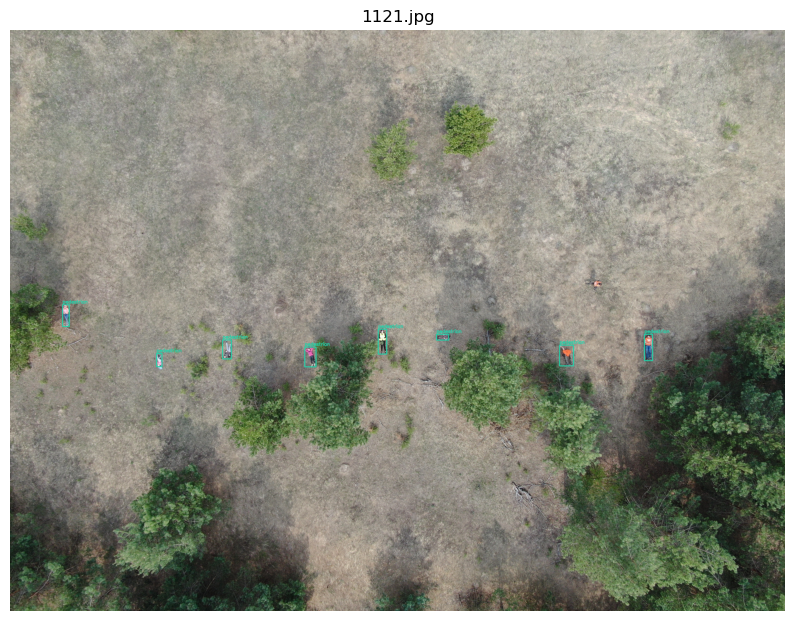

In [19]:
# Visualize first 10 images (already shuffled)
for data_num, (image_path, annotation_path) in enumerate(zip(images, annotations)):
    # Read Image
    image = cv2.imread(image_path)
    img_h, img_w = image.shape[:2]

    # Read Annotations
    boxes, labels = read_annotations(annotation_path, img_w, img_h)

    plt.figure(figsize=(10, 10))
    
    # Draw bounding boxes on the image
    for i, box in enumerate(boxes):
        x_min, y_min, x_max, y_max = box
        class_name = labels[i]
        color = COLORS[i % len(COLORS)]  # Cycle through colors

        cv2.rectangle(
            image,
            (int(x_min),int(y_min)),
            (int(x_max), int(y_max)),
            color=color,
            thickness=3,
            lineType=cv2.LINE_AA
        )
        
        cv2.putText(
            image,
            text=class_name,
            org=(x_min, max(20, y_min - 7)),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=0.8,
            color=color,
            thickness=2,
            lineType=cv2.LINE_AA
        )

    # Show image with bounding boxes
    plt.title(os.path.basename(image_path))  # Display filename
    plt.imshow(image[:, :, ::-1])  # Convert BGR to RGB for Matplotlib
    plt.axis("off")
    plt.show()

    if data_num == 3:  # Stop after 10 images
        break